In [1]:
import numpy as np
import pandas as pd

from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

import matplotlib.pyplot as plt
%matplotlib inline

# Lectura del dataset

In [2]:
# Lectura del csv
forest_df = pd.read_csv( './data/forestfires.csv', sep = ',' )

In [3]:
# Dimensión del datasaet
forest_df.shape

(517, 13)

In [4]:
# Tipo de datos de cada columna
forest_df.dtypes

X          int64
Y          int64
month     object
day       object
FFMC     float64
DMC      float64
DC       float64
ISI      float64
temp     float64
RH         int64
wind     float64
rain     float64
area     float64
dtype: object

In [5]:
# Impresión de los primeros 5 registros del dataset
forest_df.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [6]:
forest_df[ 'area' ].describe()

count     517.000000
mean       12.847292
std        63.655818
min         0.000000
25%         0.000000
50%         0.520000
75%         6.570000
max      1090.840000
Name: area, dtype: float64

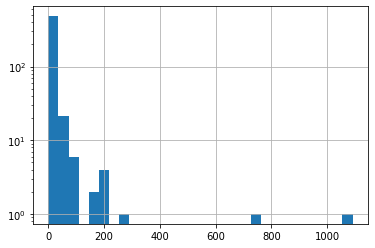

In [7]:
forest_df[ 'area' ].hist( bins = 30, log = True )

# Partición del dataset en entrenamiento y prueba

In [8]:
# Creación de la matriz que representa las características de cada registro
X = forest_df[ [ 'X', 'Y', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain' ] ]

In [9]:
# Creación del vector que representa la variable objetivo
Y = forest_df[ 'area' ]

In [10]:
# División la matriz de caracteristicas y el vector objetivo en los conjuntos de entrenamiento (70%) y prueba (30%)
X_train, X_test, Y_train, Y_test = train_test_split( X, Y, test_size = 0.3 )

In [11]:
X_train.shape

(361, 10)

In [12]:
X_test.shape

(156, 10)

# Entrenamiento del modelo

In [13]:
# Creación del modelo de regresión lineal
regr = linear_model.LinearRegression()

In [14]:
# Ajuste del modelo a partir de los datos de entrenamiento
regr.fit( X_train, Y_train )

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [15]:
# Coeficientes del modelo
regr.coef_

array([ 1.48609023,  1.02294791, -0.11549751,  0.12553545, -0.01115935,
       -0.33538461,  0.42493315, -0.23521905,  0.84798872, -8.48010567])

In [16]:
# Término independiente
regr.intercept_ 

4.861974331819222

# Evaluación del modelo

In [17]:
# Prediciendo a partir de los datos de prueba
predictions = regr.predict( X_test )

In [18]:
predictions

array([ 3.22388949e+01,  1.96014744e+01,  4.52546393e+00,  1.06360767e+01,
        8.04769017e+00,  1.55695622e+01,  5.16913378e+00,  1.83352661e+01,
        1.88508192e+01,  1.21598308e+01,  1.09887265e+01,  1.92141493e+01,
        1.58350478e+01,  9.78944316e+00,  2.43441830e+01,  1.71749065e+01,
        7.60817189e+00,  2.07087674e+01,  8.39259214e+00,  1.14968866e+01,
        1.91917666e+01,  9.94024496e+00,  1.16066113e+01,  4.13809912e+00,
        9.21561431e+00,  2.70282096e+01,  4.08693162e+00,  2.97829668e+01,
        3.73292098e+00,  5.97629236e+00,  1.20612784e+01,  2.27043599e+01,
        1.42374610e+01,  7.57623416e+00,  3.55289864e+00,  4.36168018e+00,
       -3.36073082e+01,  4.03787862e+00,  4.56412154e+00,  1.53036306e+01,
        7.16400045e+00,  1.14518919e+01,  1.32700817e+01,  7.36588402e+00,
        2.77319231e+01,  5.54454098e+00,  1.67174362e+01,  2.35448921e+01,
        1.36200939e+01,  2.84055136e+01,  2.58628040e+00,  5.53148516e+00,
        1.43010402e+01,  

In [19]:
# Error absoluto medio
mean_absolute_error( Y_test, predictions )

23.106025341159373

In [20]:
# Error cuadrático medio
mean_squared_error( Y_test, predictions )

8476.251053953747

In [21]:
# Raiz del error cuadrático medio
np.sqrt( mean_squared_error( Y_test, predictions ) )

92.06655773924507

In [22]:
# Coeficiente de determinación
r2_score( Y_test, predictions )

0.004267115141605271

# ¿Es posible disminuir el error del modelo?